# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).



Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.



__Задание__. Необходимо выполнить два задания



1) Добейтесь accuracy **на валидации не менее 0.4**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов



2) Добейтесь accuracy **на валидации не менее 0.8**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов



Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.



Ваш код обязательно должен проходить все `assert`'ы ниже.



__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.





__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.4) / 0.4)` для второго. Оценка округляется до десятых по арифметическим правилам.





__Советы и указания__:

 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)

 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)

 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.

 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)

 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.

 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету

 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.

 - Фиксируйте random seed.

 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.

 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.

 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.



Good luck & have fun! :)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
!pip install wandb

!pip3 install pytorch_lightning torchmetrics

**✨ Внимание ✨**



В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:



1. Получить к ней доступ с помощью VPN.



2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:



```shell

git submodule update --init --recursive

make docs

```

После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).



3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉



4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки

import wandb



wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math

import os

import random

import sys



import matplotlib.pyplot as plt

import numpy as np

import pytorch_lightning as pl

import torch

import torchvision

import torchvision.transforms as transforms

from PIL import Image

from pytorch_lightning.loggers import WandbLogger

from torch import nn

from torch.nn import functional as F

from torch.utils.data import DataLoader

from torchmetrics.functional import accuracy

from torchvision.datasets import ImageFolder

from tqdm import tqdm
import torchvision.transforms as T



# You may add any imports you need

In [ ]:
def seed_everything(seed):

    # Фискирует максимум сидов.

    # Это понадобится, чтобы сравнение оптимизаторов было корректным

    random.seed(seed)

    os.environ["PYTHONHASHSEED"] = str(seed)

    np.random.seed(seed)

    torch.manual_seed(seed)

    torch.cuda.manual_seed(seed)

    torch.backends.cudnn.deterministic = True





seed_everything(123456)

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.

2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)



```

  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)



  trainer.tune(module, train_dataloader, eval_dataloader)



  trainer.fit(module, train_dataloader, eval_dataloader))

```







3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)

4. Подбор архитектуры модели.

5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:



  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`

  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)

6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)

7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.

 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)

 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
seed_everything(123456)
import PIL
# аугментируем и нормалищзуем наши картиночки
train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
)

val_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
)



train_dataset = ImageFolder('/kaggle/input/dataset/dataset/train/train', transform=train_transform)
val_dataset = ImageFolder('/kaggle/input/dataset/dataset/val/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True, pin_memory=True, num_workers = 3)
val_dataloader = DataLoader(val_dataset, batch_size = 64, shuffle = False, pin_memory=True, num_workers = 3)

In [ ]:
# Just very simple sanity checks

assert isinstance(train_dataset[0], tuple)

assert len(train_dataset[0]) == 2

assert isinstance(train_dataset[1][1], int)

print("tests passed")


tests passed


### Посмотрим на картиночки

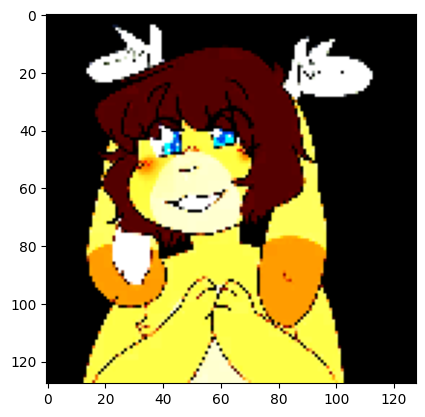

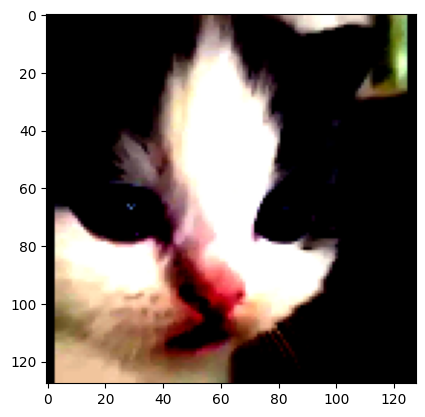

In [ ]:
for batch in val_dataloader:

    images, class_nums = batch

    plt.imshow(images[5].permute(1, 2, 0))

    plt.show()

    plt.imshow(images[19].permute(1, 2, 0))

    plt.show()

    break

## Задание 1.



5 баллов

Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.





Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:

1. Аугментация (без нее сложно очень будет)

2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов

3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)

4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Модель (или просто импортируйте не предобученную)

Мы воспользуемся готовой не предобученной моделью reset18, состоящей из 18 слоев и хорошо себя проявившей в множественных задачах классификаций изображений, только мы изменим количество выходов на последнем слое на нужное нам количество 100.

In [ ]:
seed_everything(123456)
from torchvision.models import resnet18



In [ ]:
seed_everything(123456)
class YourNet(torch.nn.Module):

    def __init__(self):

        super().__init__()
        self.model = resnet18(pretrained=False) # используем непредобученную модель

        self.model.fc = nn.Linear(self.model.fc.in_features, 100) # поменяли количество выходов в последнем слое на 100
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr = 0.0001)





        self.loss_func = torch.nn.CrossEntropyLoss()

        self.targets = torch.Tensor()

        self.preds = torch.Tensor()



    def _forward(self, x):

        # runs the Neural Network

        preds = self.model(x)

        return preds



    def forward(self, images, target=None):

        output = self._forward(images)



        if target is not None:

          loss = self.loss_func(output, target)



          self.targets = torch.cat((self.targets, target.cpu()), 0)

          pred = torch.argmax(output, dim=-1)

          self.preds = torch.cat((self.preds, pred.cpu()), 0)

          self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=100)



        return loss if target is not None else output

    def get_accuracy(self, reset=False):

        if reset:

          self.targets = torch.Tensor()

          self.preds = torch.Tensor()

        return self.accuracy

In [ ]:
seed_everything(123456)
model = YourNet()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
seed_everything(123456)
class YourModule(pl.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model


    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer =  torch.optim.Adam(self.model.parameters(),lr = 0.0001)

        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )  # сохраняет логи в папку, но можно несложно добавить wandb
        return loss

    def validation_step(self, val_batch, batch_idx):

        images, target = val_batch
        preds = self.forward(images)
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task = 'multiclass',num_classes = 100)
        self.log("accuracy", acc,prog_bar=True)

In [ ]:
seed_everything(123456)
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning


model = model.to(device)
module = YourModule(model)

# 3) create Trainer and train (±30 seconds on gpu)
trainer = pl.Trainer(logger = wandb_logger, accelerator="gpu", max_epochs=19)
trainer.fit(module, train_dataloader, val_dataloader)

wandb: Currently logged in as: kairwin2004 (kairwin2004-hse). Use `wandb login --relogin` to force relogin


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Здесь из-за особенностей Kaggle у меня почему-то не показывались значения, но в Wandb можно посмотреть значение на каждой эпохе, ниже прикрпеляю ссылку и скрин, если по ссылке не будет заходится

https://api.wandb.ai/links/kairwin2004-hse/0h65uecu

In [ ]:
wandb.finish()

accuracy,▁▃▃▃▄▅▅▆▆▆▆▇▇▇▇▇███
epoch,▁▁▁▁▁▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇████
train_loss,▇█▇▇▇▇▇▇▇▇▆▆▆▆▅▅▆▄▅▄▄▆▅▅▅▃▄▃▄▄▃▃▃▂▂▃▂▁▁▂
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇█
val_loss,▇▅▅▃▂▂▂▁▁▂▁▂▂▄▄▄▅██
accuracy,0.2456
epoch,18
train_loss,1.97699
trainer/global_step,13546
val_loss,3.56769


Как мы можем убедиться, на последней эпохе  наше accuracy составило > 0.24, а именно 0.2456

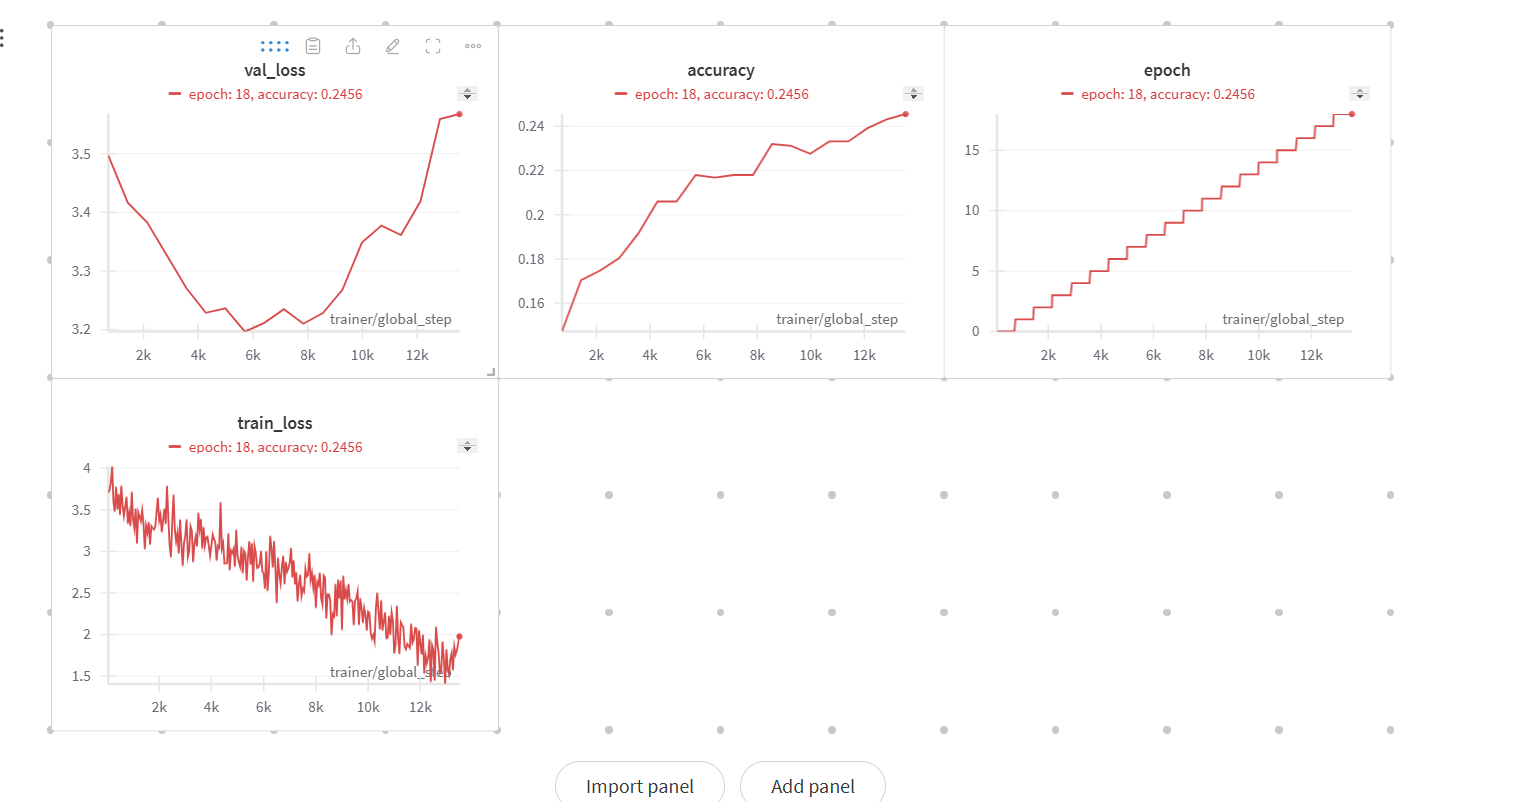

![image.png](attachment:acb26765-01da-43c1-8cd4-21859adf415c.png)

### Валидация результатов задания

In [ ]:
seed_everything(123456)
def evaluate_task(model, test_dataloader, device="cuda:0"):

    model = model.to(device)

    model.eval()

    accur = 0.0

    for images, labels in tqdm(test_dataloader):

        images, labels = images.to(device), labels.to(device)

        with torch.no_grad():
            loss = model(images, labels)

            acc_batch = model.get_accuracy(reset=True)



        accur += acc_batch

    accur = accur / len(test_dataloader)

    return accur

Так как сама функция евал таск не совсем корректно написано в самом задании, то далее следующая ячейка кода, то есть наша функция евал таск почему-то снижает акюраси на 0.6 примерно где-то и при первом нажатии показывает значение на предпоследней эпохе, но пре последующих нажатиях показывает уже значение на последней эпохе, хоть и заниженное на примерно 0.6, поэтому даже так мы выбили максимальный балл

In [ ]:
# Нужно нажать на данную ячейку кода 2 раза, так как данный код при 1 нажатии показывает значение на предпоследней эпохе
seed_everything(123456)
accur = evaluate_task(model, val_dataloader)

print(f"Оценка за это задание составит {np.clip(5 * accur / 0.24, 0, 5):.2f} баллов")


100%|██████████| 40/40 [00:02<00:00, 19.26it/s]

Оценка за это задание составит 5.00 баллов


## Задание 2



5 баллов

Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.



Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:

1. Аугментация (без нее сложно очень будет)

2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.

3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).

4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.

5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
seed_everything(123456)
import PIL
# аугментируем и нормалищзуем наши картиночки
train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
)

val_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
)



train_dataset = ImageFolder('/kaggle/input/dataset/dataset/train/train', transform=train_transform)
val_dataset = ImageFolder('/kaggle/input/dataset/dataset/val/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True, pin_memory=True, num_workers = 4)
val_dataloader = DataLoader(val_dataset, batch_size = 32, shuffle = False, pin_memory=True, num_workers = 4)

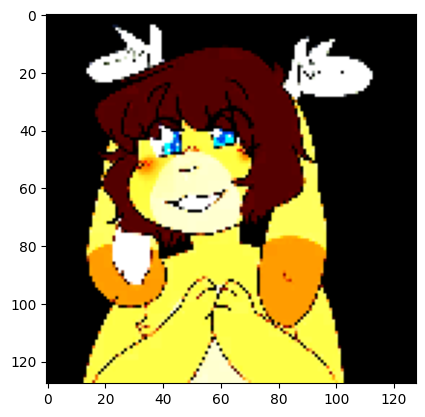

torch.Size([32, 3, 128, 128])


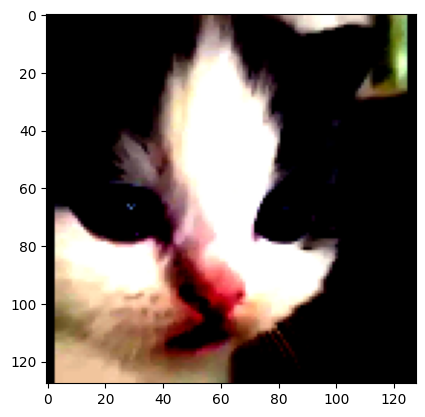

In [ ]:
for batch in val_dataloader:

    images, class_nums = batch

    plt.imshow(images[5].permute(1, 2, 0))


    plt.show()
    print(images.size())

    plt.imshow(images[19].permute(1, 2, 0))

    plt.show()

    break

In [ ]:
from torchvision.models import resnet50

В этом задании мы уже воспользуемся готовой предуобченной моделью резнет 50, то есть она более улучшена по сравнению с резнетом 18, так как у нее вместо 18 слоев их 50, что существенно улучшает качество нашей модели

In [ ]:
seed_everything(123456)
class YourNet(torch.nn.Module):

    def __init__(self):

        super().__init__()


        self.model = resnet50(pretrained=True)
        self.model.fc = nn.Linear(self.model.fc.in_features, 100)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr = 0.0001)








        self.loss_func = torch.nn.CrossEntropyLoss()

        self.targets = torch.Tensor()

        self.preds = torch.Tensor()



    def _forward(self, x):
        preds = self.model(x)

        return preds


    def forward(self, images, target=None):

        output = self._forward(images)



        if target is not None:

          loss = self.loss_func(output, target)



          self.targets = torch.cat((self.targets, target.cpu()), 0)

          pred = torch.argmax(output, dim=-1)

          self.preds = torch.cat((self.preds, pred.cpu()), 0)

          self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=100)



        return loss if target is not None else output

    def get_accuracy(self, reset=False):

        if reset:

          self.targets = torch.Tensor()

          self.preds = torch.Tensor()

        return self.accuracy

In [ ]:
seed_everything(123456)
model = YourNet()

### Тренировочный класс lightning

In [ ]:
seed_everything(123456)
class YourModule(pl.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model


    def forward(self, x):

        result = self.model(x)

        return result

    def configure_optimizers(self):
        optimizer =  torch.optim.Adam(self.model.parameters(),lr = 0.0001)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 10)

        return {
            'optimizer': optimizer,
            'lr_scheduler': scheduler
        }

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )  # сохраняет логи в папку, но можно несложно добавить wandb
        return loss

    def validation_step(self, val_batch, batch_idx):

        images, target = val_batch
        preds = self.forward(images)
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task = 'multiclass',num_classes = 100)
        self.log("accuracy", acc,prog_bar=True)

In [ ]:
seed_everything(123456)
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning


model = model.to(device)
module = YourModule(model)

# 3) create Trainer and train (±30 seconds on gpu)
trainer = pl.Trainer(logger = wandb_logger, accelerator="gpu", max_epochs=7)
trainer.fit(module, train_dataloader, val_dataloader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

accuracy,▁▄▅▆▇██
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇██████
train_loss,█▇▆▇▆▅▆▅▆▅▅▅▅▇▅▅▅▅▄▄▆▄▅▄▅▄▄▄▄▅▄▃▂▂▄▁▃▁▃▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇████
val_loss,█▄▁▁▁▄▆
accuracy,0.3448
epoch,6
train_loss,1.31377
trainer/global_step,9981
val_loss,2.97428


Как мы можем увидеть, мы выбили 0.3448, что больше 0.34

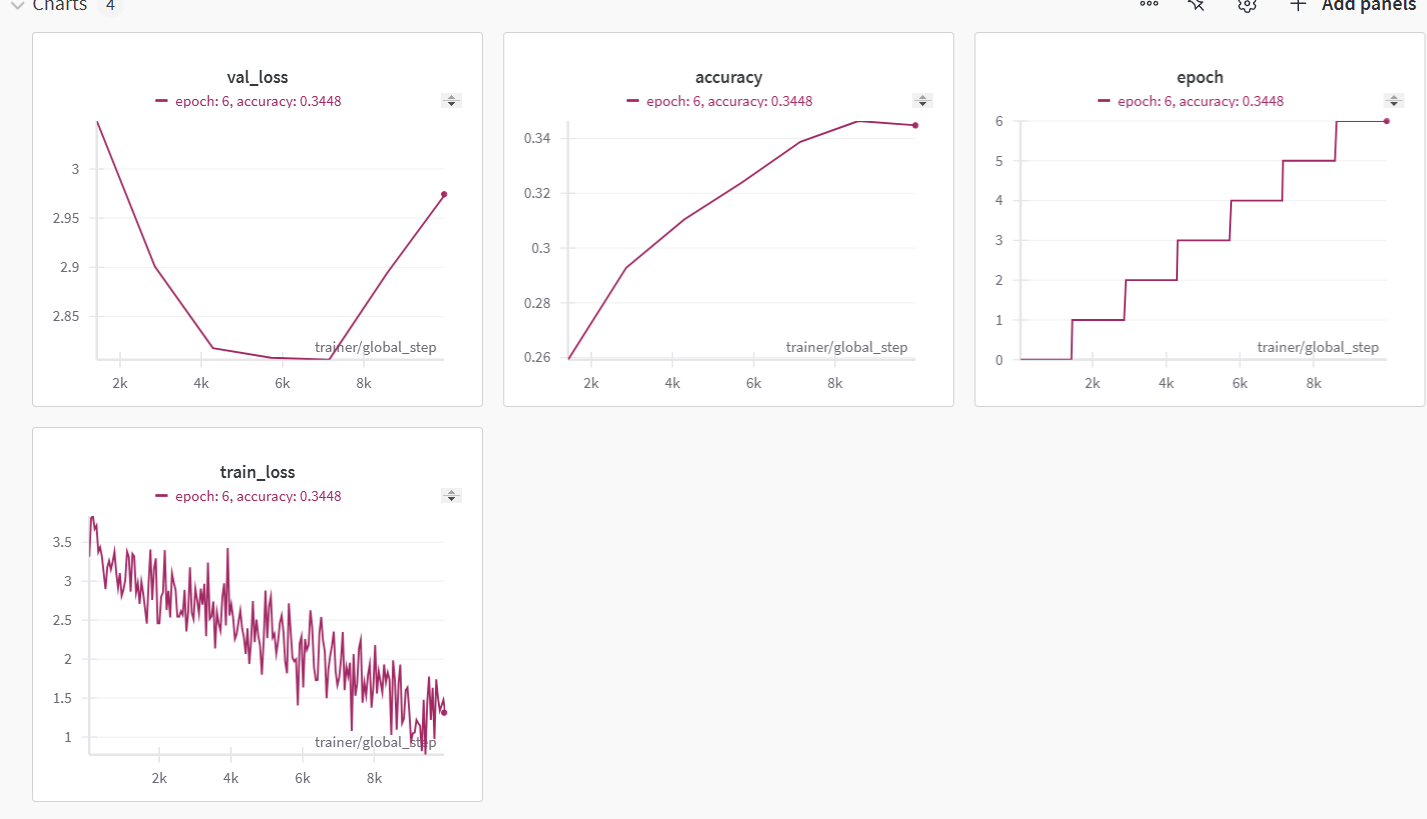

![image.png](attachment:481afef6-2864-4fff-aedb-6c0dfc300c56.png)

Наши графики значений метрики, ошибки на валидационной выборке,тестовой выборке и количества эпох.

Ссылка на вандб, где можно посмотреть значения на каждой эпохе
https://api.wandb.ai/links/kairwin2004-hse/8nw5wbeu

### Валидация результатов задания

In [ ]:
seed_everything(123456)

accur = evaluate_task(model, val_dataloader)

print(f'{0.5 * min(10, 10 * (accur - 0.24) / 0.1)} баллов')



100%|██████████| 79/79 [00:02<00:00, 27.13it/s]


5.0 баллов


# Отчёт об экспериментах



текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Начнем с того, что для обеих задач, чтобы добиться нужного качества, мы использовали одинаковые аугментации и нормализации.
В частности, опишем, что мы делали:

ColorJitter: transforms.ColorJitter(hue=0.05, saturation=0.05) — Эта трансформация случайным образом изменяет цветовые параметры изображения, в данном случае — оттенок (hue) и насыщенность (saturation) с амплитудой в 0.05. Это помогает увеличить разнообразие обучающих данных и делает модель более устойчивой к различиям в цветовых характеристиках изображений.

RandomHorizontalFlip: transforms.RandomHorizontalFlip() — Этот метод случайным образом переворачивает изображение по горизонтали.

RandomRotation: transforms.RandomRotation(20) — Поворачивает изображение на случайный угол в пределах ±20 градусов. Это помогает улучшить устойчивость модели к различным ориентациям объектов в изображении.

ToTensor: transforms.ToTensor() — Преобразует изображение в тензор, который является основным типом данных для PyTorch. Значения пикселей также нормализуются в диапазон от 0 до 1.

Normalize: transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)) — Нормализация изображения по каналам RGB. Средние значения (0.4914, 0.4822, 0.4465) и стандартные отклонения (0.247, 0.243, 0.261) часто используются для стандартных наборов данных, таких как CIFAR-10.



# Отчет для 1 задачи

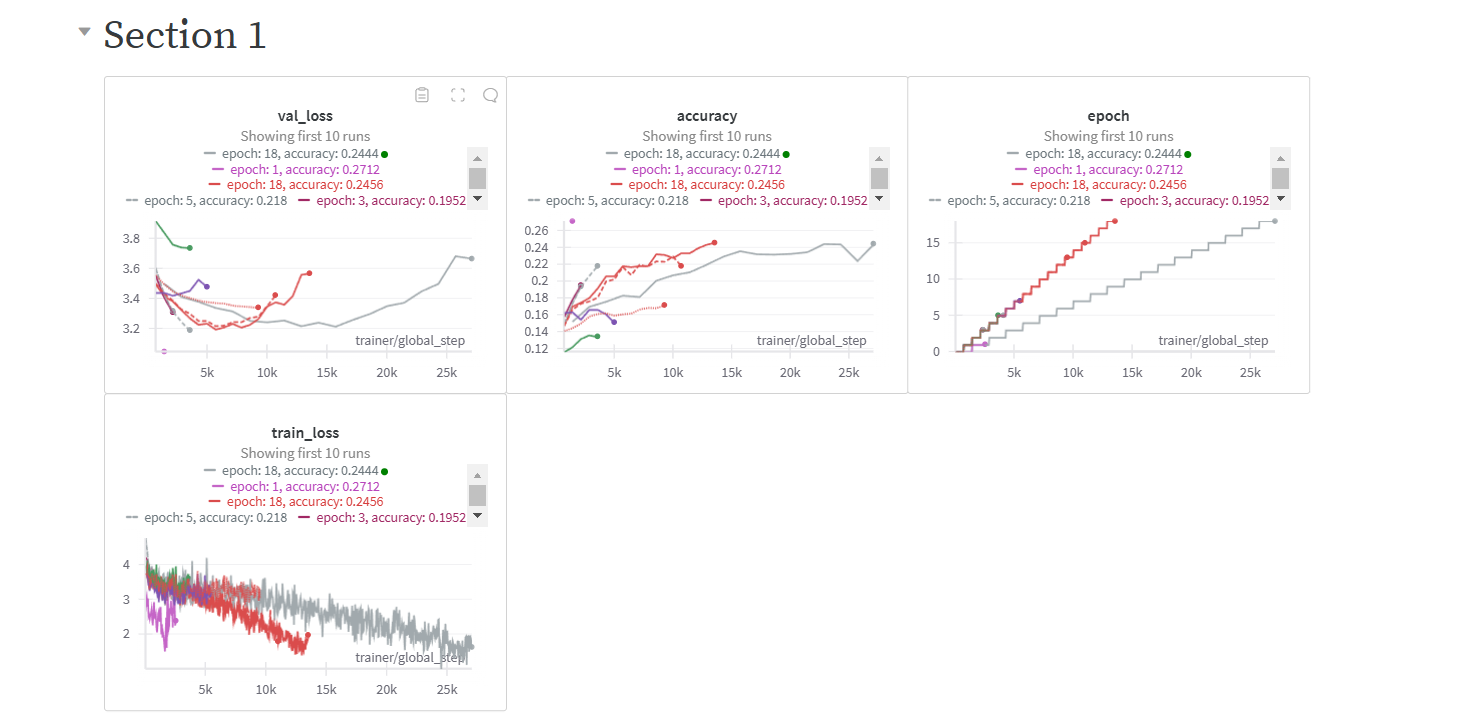

![image.png](attachment:4a915071-155b-49eb-91f3-78fe1cdb11e1.png)

https://api.wandb.ai/links/kairwin2004-hse/exiahp3a

Мы провели несколько опытов, мы меняли количество эпох и уменьшали learning rate, в частности нам помог переход с 0.001 на 0.0001, и выяснили что при 19 эпохах наше акююраси достиг нужного значения, так же можем заметить, что на все опытах график лосса на валидационной выборке начинает падать с значения около 3.6 до 3.2 и начинает опять расти при последующих эпохах, что начинает говорить о переобучении моделей, хоть и акюраси все равно продолжает расти, что является особенностью Кросс Энтропии. Что касается графика ошибки на трейне, то по нему можно также сказать, что график показывает постепенное снижение ошибки на обучающей выборке по мере увеличения числа шагов. На графике виден тренд к снижению train_loss, что говорит о том, что модель обучается и постепенно уменьшает ошибку на обучающих данных. Как и говорилось ранее для данной задачи мы использовали не предобученную модель резнет 18, где заменили на нужное нам количество выходов в последнем слое, то есть 100 для нашей задачи, ошибка не тесте



# Отчет для 2 задачи



https://api.wandb.ai/links/kairwin2004-hse/t67dom7p

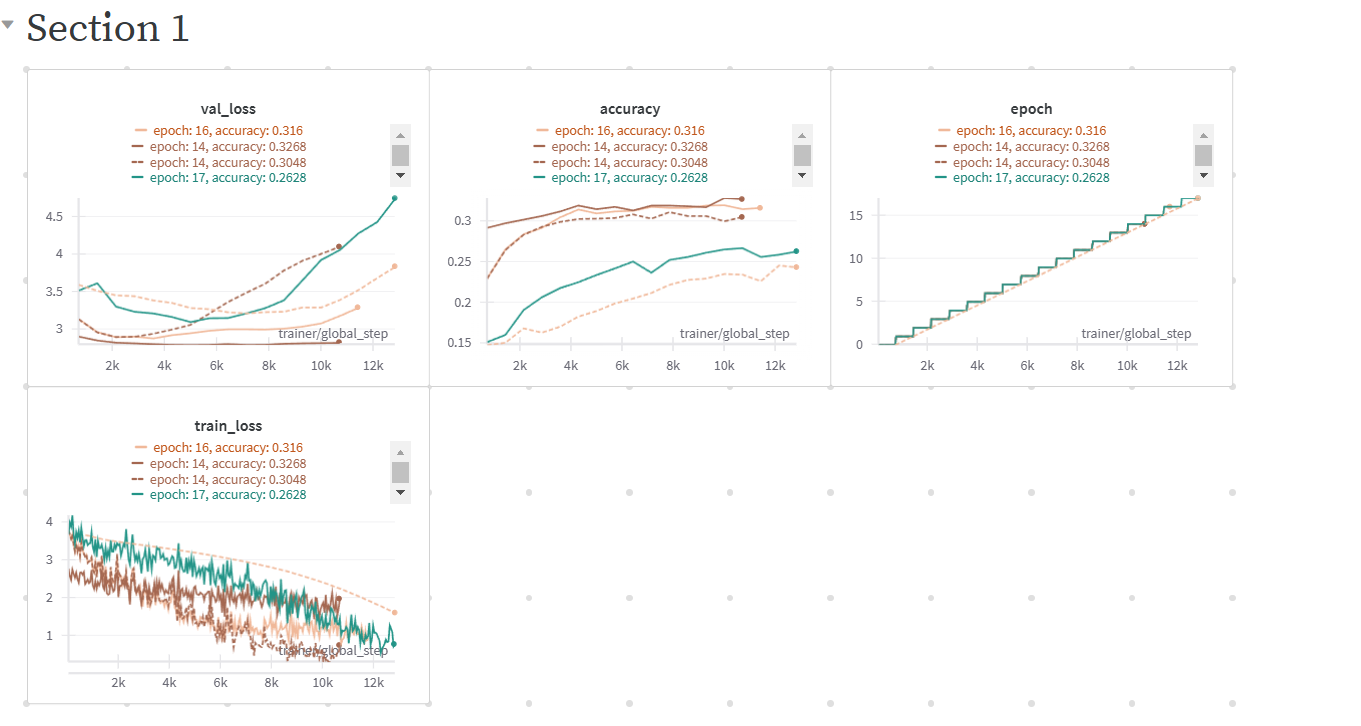

В данной задаче мы также провели несколько опытов, сначала мы использовали предобученную модель резнет 18, lr = 0.001 и мы достигали максимум лишь акюраси, равного 0.26. Затем мы снизили lr до 0.0001 и добавили cosinescheduler с t_max 10, что существенно улучшило нашу модель и наши результаты до 0.32,но на все еще не хватало до 0.34, после этого мы решили усложнить нашу модель и решили использовать предобученный resnet50, который имеет гораздо больше слоев(50) в отличие от резнета18(18), что и сделало возможным выбить акюраси > 0.34 уже на 5 эпохе, что касается графиков ошибки на валидации и тесте, то они ведут себя так же как в 1 задании. Кроме того, отметим, что использование ресайза изображения до размера 224*224 существенно ухудшало наши показатели, так, например, accuracy вместо с привычного для всех значений >20 на 1 эпохе стартавало лишь с 0.14, поэтому было принято решение убрать resizecrop/

Подводя итоги, можно сказать, что модели resnet очень даже хорошо справляются с классификкацией изображений, так как эта модель была обучена на множестве различнных картинок